In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [24]:
# Load the dataset
data = pd.read_csv("EastWestAirlines(1).csv")

In [25]:
# Data Exploration
print(data.head())
print(data.info())
print(data.describe())

   ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0   1    28143           0          1          1          1          174   
1   2    19244           0          1          1          1          215   
2   3    41354           0          1          1          1         4123   
3   4    14776           0          1          1          1          500   
4   5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  
0            1                  0                0               7000      0  
1            2                  0                0               6968      0  
2            4                  0                0               7034      0  
3            1                  0                0               6952      0  
4           26               2077                4               6935      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 

In [26]:
# Data Preprocessing
X = data.iloc[:, 1:-1]  # Selecting relevant columns for clustering

In [27]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=5, linkage='ward')
agg_clusters = agg_clustering.fit_predict(X_scaled)

In [29]:
# K-means Clustering (Elbow Method to Find Optimal K)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

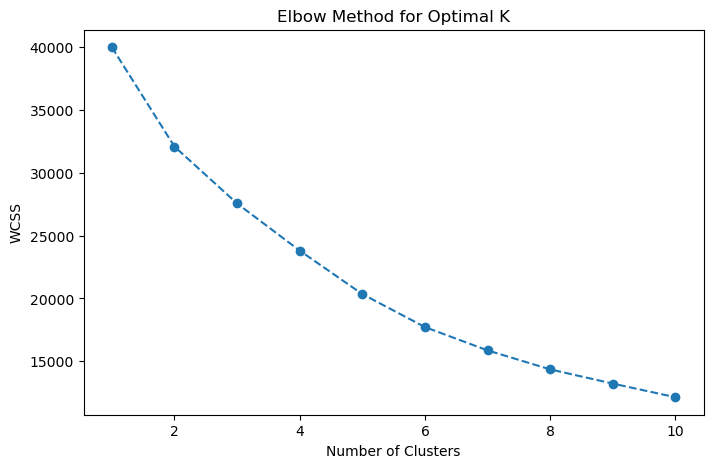

In [30]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
# Based on the Elbow Method, choose the optimal number of clusters
optimal_k = 3 

In [32]:
# Perform K-means clustering with the chosen K
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, random_state=0)
kmeans_clusters = kmeans.fit_predict(X_scaled)


In [33]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_scaled)

In [34]:
# Principal Component Analysis (PCA) for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [37]:
# Visualize Clusters
plt.figure(figsize=(18, 6))

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

Text(0.5, 1.0, 'Hierarchical Clustering')

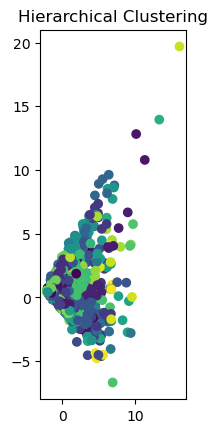

In [36]:
# Hierarchical Clustering
plt.subplot(131)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_clusters, cmap='viridis')
plt.title('Hierarchical Clustering')

Text(0.5, 1.0, 'K-means Clustering (K=3)')

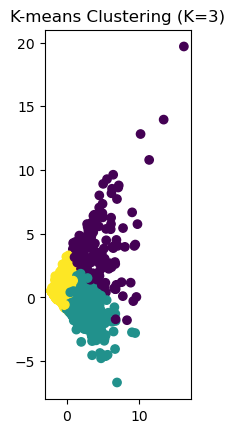

In [38]:
# K-means Clustering
plt.subplot(132)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title(f'K-means Clustering (K={optimal_k})')

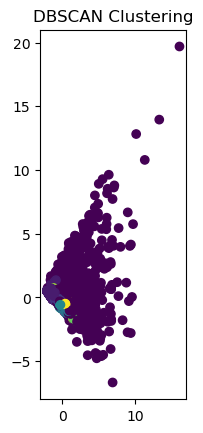

In [39]:
# DBSCAN Clustering
plt.subplot(133)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_clusters, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.show()

In [40]:
# Silhouette Score for K-means Clustering
silhouette_avg = silhouette_score(X_scaled, kmeans_clusters)
print(f'Silhouette Score for K-means: {silhouette_avg}')

Silhouette Score for K-means: 0.330411996315242


In [ ]:
#### Inference: a Silhouette Score of approximately 0.33 for K-means suggests that the clusters have a reasonable separation and cohesion